# Probability Questions 0 (from your excellent TA Morris)

1. How does the estimation procedure called for finding the optimal parameter value(s) of a model given data work? 

    a. MLE

2. What are good working definitions for the likelihood and prior? 

    a. likelihood: the joint density of the data as a function of the parameters

    b. prior: belief about the parameter
<!--
    1. The terms "data" and "parameters" or "model" might be useful in the likelihood definition
    2. The terms "probability" or "belief" might be useful in the prior definition
-->
3. What does introducing a prior mean in terms of choosing a model and its parameters?

4. What is "certainty" or "level of belief" in how do you express it?

# Probability Questions 1

---

1. Estimate $\Pr(a \leq X \leq b)$ for $X \sim \textrm{beta}(\alpha,\beta)$ by sampling from a beta distribution 
2. Express this statement as an expectation with $f(x)$ the beta density in question 


(0.106, 0.2179323450235298)

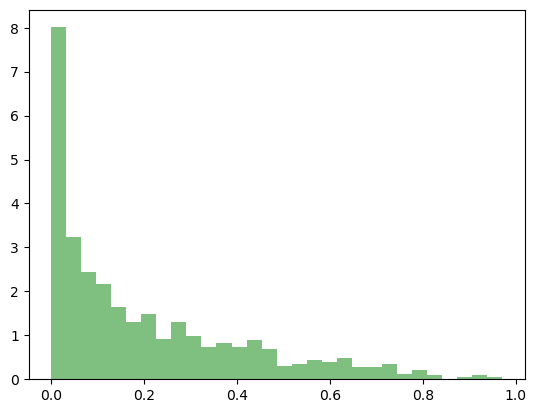

In [57]:
from scipy import stats
import numpy as np; import matplotlib.pyplot as plt


alpha,beta = 0.5,2; parameter_domain = np.linspace(0,1,1000)
prior = stats.beta(a=alpha,b=beta)
sample = prior.rvs(1000)
plt.hist(sample, bins=30, density=True, alpha=0.5, color='g')

interval = (sample>0.5) & (sample<0.9)
interval.mean(), interval.std()/1000**0.05

# plt.figure(figsize=(8,4)); plt.ylim([-0.5,1.5])
# plt.plot(parameter_domain, prior.pdf(parameter_domain));

In [3]:
prior.cdf(.2)

0.2

In [46]:
m = 10000
(prior.rvs(m)<0.2).mean()


25

## Monte Carlo Integration
### All Bayesian estimates are just Monte Carlo Integration...

$$
\Large
\begin{align*}
\Pr(a\leq X\leq b)  {} = & \int_a^b f(x) dx \\
{} = & \int 1_{[a,b]}(x) f(x) dx = \mathrm{I\!E}[1_{[a,b]}(x_i)]\\
& \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\;\;\;\approx \frac{1}{n} \sum_{i=1}^n 1_{[a,b]}(x_i)
\end{align*}
$$


In [53]:
(prior.rvs(m)<0.2).std()/m**0.5

0.0039818869898579495

# Diversion 1: Likelihoods

---


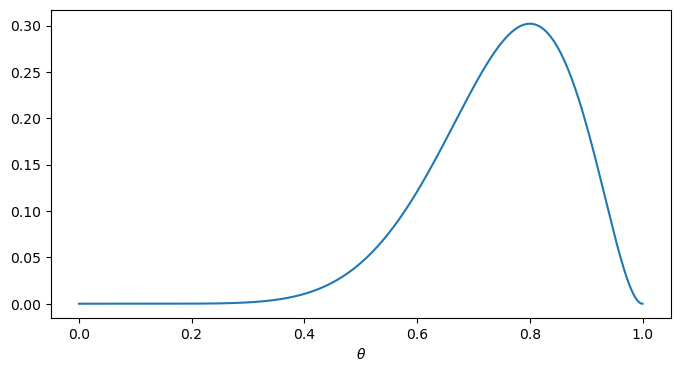

In [41]:
n,x = 10,8  # p_=0.75; stats.binom(n=n, p=p_).rvs()
likelihood = lambda theta: stats.binom(n=n, p=theta).pmf(x)

plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.plot(parameter_domain, likelihood(parameter_domain));

# Diversion 2: Posteriors

---

$$
\Large
\begin{align*}
\overset{posterior}{p(\theta|x)} &={} \frac{\overset{likelihood}{p(x|\theta)}\times \overset{prior}{p(\theta)}}{\overset{\text{evidence}}{p(x)}}\\
\end{align*}
$$

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**


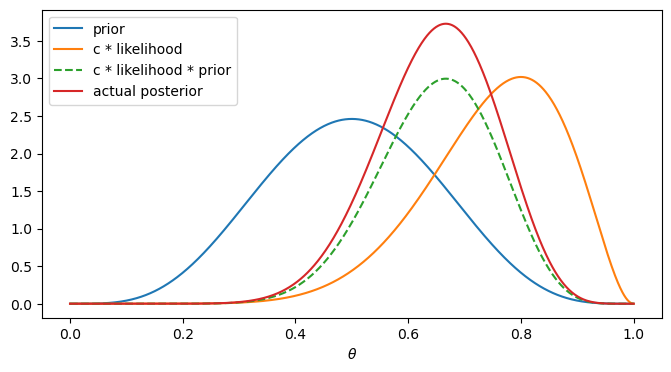

In [78]:
plt.figure(figsize=(8,4))

alpha,beta = 5,5; parameter_domain = np.linspace(0,1,1000)
prior = stats.beta(a=alpha,b=beta)

plt.plot(parameter_domain, prior.pdf(parameter_domain), 
         label='prior')

n,x = 10,8  # p_=0.75; stats.binom(n=n, p=p_).rvs()
likelihood = lambda p: stats.binom.pmf(n=n, k=x, p=p)

c = 10
plt.plot(parameter_domain, c*likelihood(parameter_domain),
         label='c * likelihood')
plt.plot(parameter_domain, 
         c*likelihood(parameter_domain)*prior.pdf(parameter_domain),
         label='c * likelihood * prior', linestyle="--")

posterior = stats.beta(a=alpha+x,b=beta+n-x)

plt.plot(parameter_domain, posterior.pdf(parameter_domain), 
         label='actual posterior')

plt.legend(); plt.xlabel('$\\theta$');

# Probability Questions 2

---

1. Estimate $\Pr(a \leq p \leq b | x)$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$ based on sampling 
2. What values for $a$ and $b$ solve $\Pr(a \leq \theta \leq b | x) = 0.95$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$?
3. What is your best guess of the values for $a$ and $b$ that solve $\Pr(a \leq \theta \leq b | x) = 0.95$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$ if you only have a sample from the beta distribution?


lower bound: 0.43449843115384906, upper bound:0.8371141278449004
area under the curve: 0.95007, standard error: 0.0006887452003462529


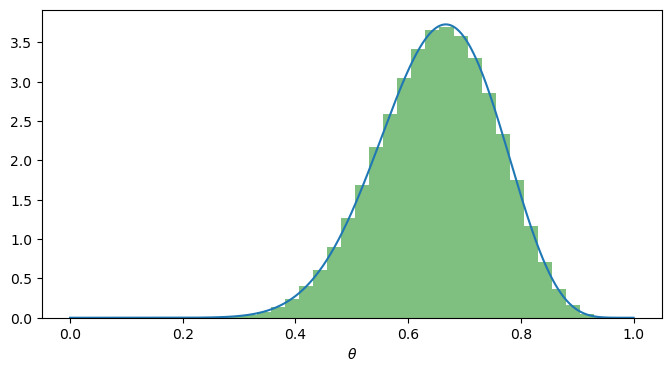

In [103]:
plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
posterior = stats.beta(a=alpha+x, b=beta+n-x)
plt.plot(parameter_domain, posterior.pdf(parameter_domain));

sample_size = 100000
sample = posterior.rvs(sample_size)
plt.hist(sample, bins=30, density=True, alpha=0.5, color='g')
a, b = posterior.ppf(0.025), posterior.ppf(0.975)
interval = (sample>a) & (sample<b)

# 2
print(f"lower bound: {posterior.ppf(0.025)}, upper bound:{posterior.ppf(0.975)}")
print(f"area under the curve: {interval.mean()}, standard error: {interval.std()/sample_size**0.5}")




In [105]:
posterior_m = posterior.rvs(m)
sorted(posterior_m)[int(m/40)], sorted(posterior_m)[-int(m/40)]


(0.4383288423742299, 0.8400655120683157)

## Bayesian Credible Interval
$$\Large
\begin{align*}
\underset{\text{e.g., $\alpha=0.05$}}{(1-\alpha)} &\approx{} \int_a^b  p(\theta|x) d\theta \\ & {} \quad \quad  \text{ for } \quad \underset{\text{where $\theta_{(k)}$ is the $k^{th}$ rank ordered posterior sample}}{a=\theta_{\left(\left\lfloor m\times\frac{\alpha}{2}\right\rfloor\right)} \text{ and } b=\theta_{\left(\left\lceil m\times(1-\frac{\alpha}{2})\right\rceil\right)}}
\end{align*}
$$

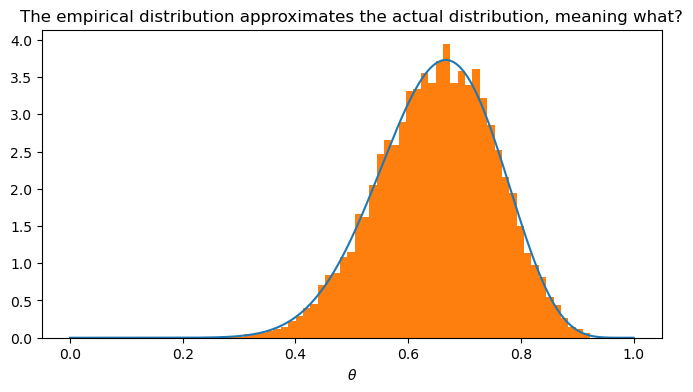

In [107]:
plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.title("The empirical distribution approximates the actual distribution, meaning what?")
plt.plot(parameter_domain, posterior.pdf(parameter_domain));
hist = plt.hist(posterior_m, bins=50, density=True)

#plt.vlines([sorted(posterior_m)[int(m/40)],
#            sorted(posterior_m)[-int(m/40)]],0,hist[0].max()); 

5. What does the fact that the empirical distribution approximates the actual distribution allow us to do?

allows us to get rid of the actual function

6. Why might this be useful?

if we dont have the actual given fuction, we can still estimate using sample

7. How is this different than calculating probabilities?

Its kinda similar (one does natural integral, one does estimation by taking sum)

8. Why is Bayesian inference different from Frequentist inference?

Parameter of interests are now random variables, so we make probability statements about the random variable


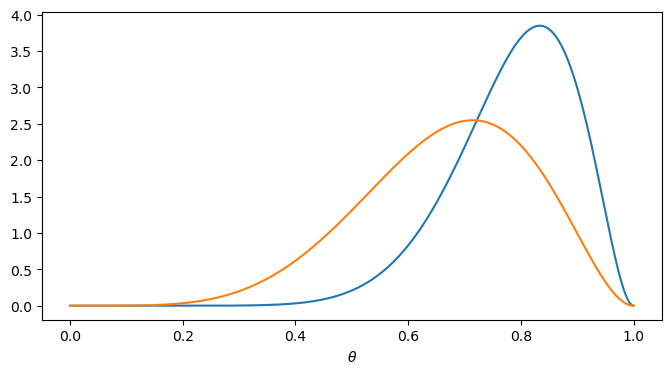

In [10]:
alpha,beta = 3,1; parameter_domain = np.linspace(0,1,1000)
prior = stats.beta(a=alpha,b=beta)

n1,x1 = 10,8  
posterior1 = stats.beta(a=alpha+x1,b=beta+n1-x1)
n2,x2 = 5,3  
posterior2 = stats.beta(a=alpha+x2,b=beta+n2-x2)

plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.plot(parameter_domain, posterior1.pdf(parameter_domain))
plt.plot(parameter_domain, posterior2.pdf(parameter_domain));


9. What is $\Pr(\theta_1<\theta_2|x1,x2) = \int\int 1_{\theta_1 < \theta_2}(\theta_1, \theta_2) p(\theta_1|x1)p(\theta_2|x2) d \theta_1 d \theta_2$?



10. What is the chance that a single sample $\theta_1^{(m)}$ is less than another single sample $\theta_2^{(m)}$?


11. What is the density $f(\theta_1 \div \theta_2)$



# Homework

---

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is observed.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }p=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is a proper distribution_**

**Distribution: Discrete Categorical Distribution with parameters p = (p_1, p_2, ..., p_101) is a parameter vector of that categorical distribution**

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

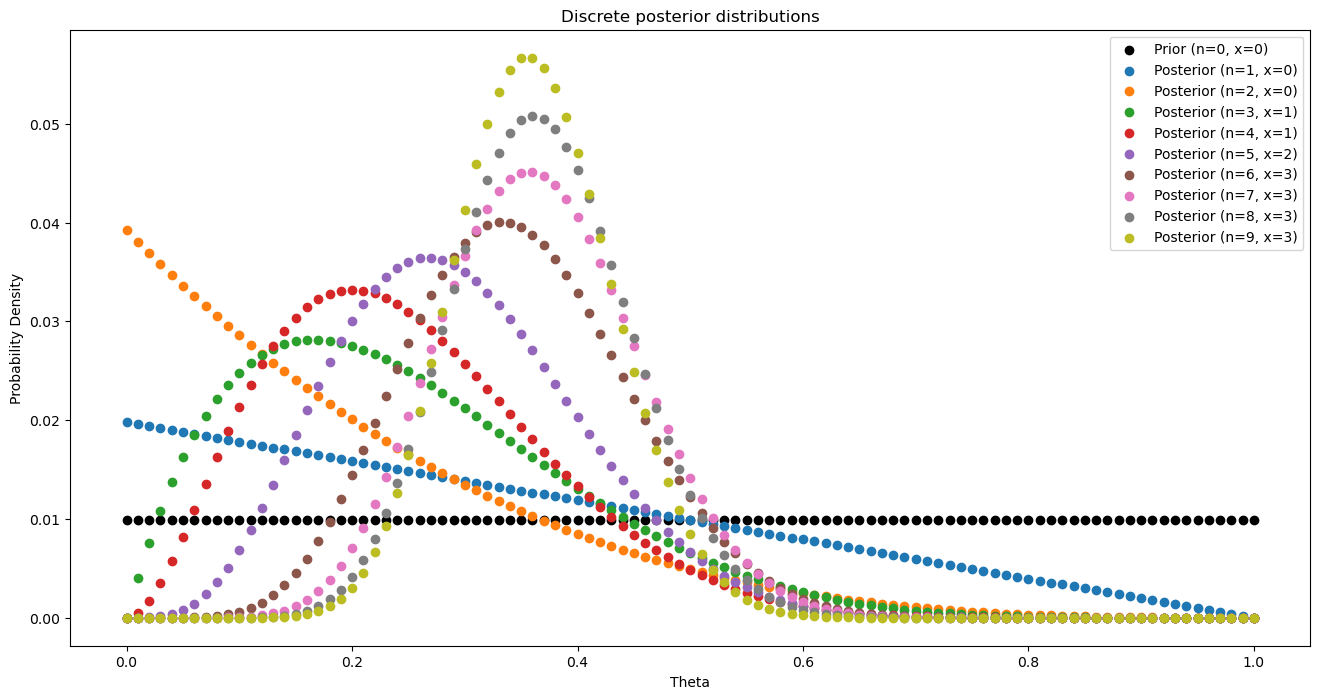

In [32]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Define the parameter domain and prior distribution
parameter_domain = np.linspace(0, 1, 101)  # Grid of theta values
prior = np.ones(101) / 101  # Uniform prior over the grid

# Observations: 0 for failure, 1 for success
observations = [0, 0, 1, 0, 1, 1, 0, 0, 0]

# Initialize counters for total trials (n) and successes (x)
n, x = 0, 0

# Set up the plot
plt.figure(figsize=(16, 8))
plt.scatter(parameter_domain, prior, label=f"Prior (n={n}, x={x})", color="k")
plt.title(
    "Discrete posterior distributions"
)

# Sequential updates
for observation in observations:
    n += 1  # Increment total trials
    x += observation  # Increment successes if observation is 1

    # Update posterior based on the binomial likelihood
    likelihood = parameter_domain ** x * (1 - parameter_domain) ** (n - x)
    posterior = prior * likelihood
    posterior /= posterior.sum()  # Normalize to ensure it sums to 1

    # Update prior for the next iteration (sequential update)
    prior = posterior

    # Plot the posterior distribution
    plt.scatter(
        parameter_domain,
        posterior,
        label=f"Posterior (n={n}, x={x})",
    )

plt.legend()
plt.xlabel("Theta")
plt.ylabel("Probability Density")
plt.show()


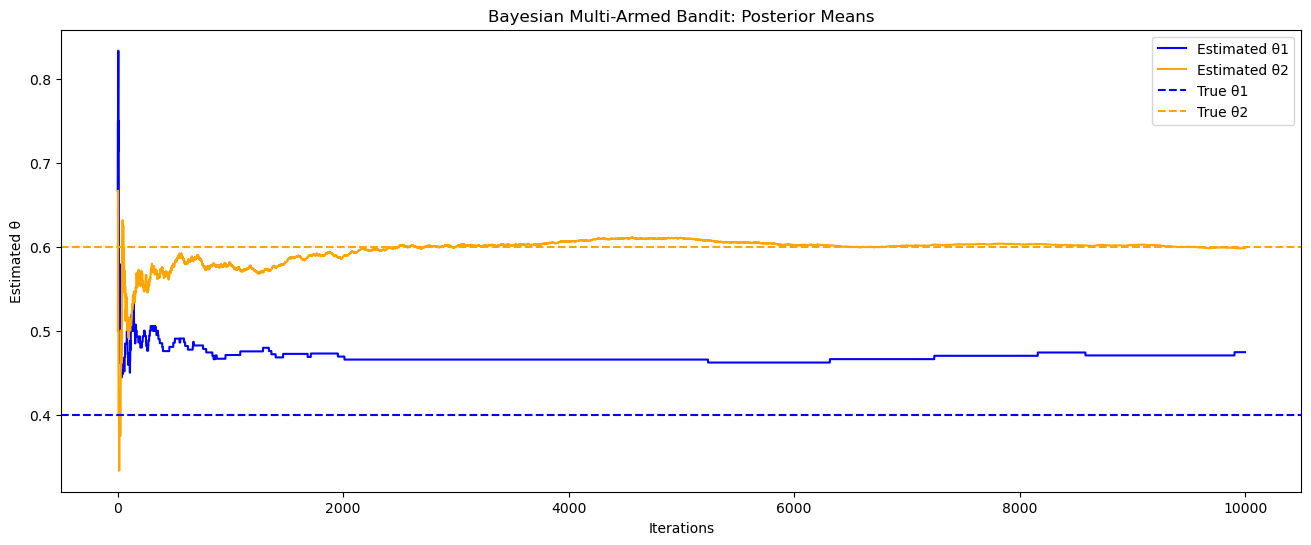

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# True probabilities for the two arms
theta_true_1 = 0.4
theta_true_2 = 0.6

# Initialize Beta parameters for each arm
alpha = [1, 1]  # Prior successes for arms 1 and 2
beta = [1, 1]   # Prior failures for arms 1 and 2

# Number of iterations
iterations = 10000

# Track posterior means over time
theta_estimates_1 = []
theta_estimates_2 = []

# Track the choices made
choices = []

# Simulate the Bayesian Multi-Armed Bandit
for t in range(iterations):
    sampled_theta_1 = np.random.beta(alpha[0], beta[0])
    sampled_theta_2 = np.random.beta(alpha[1], beta[1])
    
    if sampled_theta_1 > sampled_theta_2:
        choice = 0  # Arm 1
    else:
        choice = 1  # Arm 2
    choices.append(choice)
    
    # Simulate a reward based on the true probability of the chosen arm
    if choice == 0:
        reward = np.random.rand() < theta_true_1
    else:
        reward = np.random.rand() < theta_true_2
    
    # Update the Beta parameters for the chosen arm
    alpha[choice] += reward
    beta[choice] += 1 - reward
    
    # Track the mean of the posterior distributions
    theta_estimates_1.append(alpha[0] / (alpha[0] + beta[0]))
    theta_estimates_2.append(alpha[1] / (alpha[1] + beta[1]))

# Plot the estimated probabilities
plt.figure(figsize=(16, 6))
plt.plot(theta_estimates_1, label="Estimated θ1", color='blue')
plt.plot(theta_estimates_2, label="Estimated θ2", color='orange')
plt.axhline(theta_true_1, color='blue', linestyle='--', label="True θ1")
plt.axhline(theta_true_2, color='orange', linestyle='--', label="True θ2")
plt.xlabel("Iterations")
plt.ylabel("Estimated θ")
plt.title("Bayesian Multi-Armed Bandit: Posterior Means")
plt.legend()
plt.show()

## Bayesian/Sequential Learning

A prior is updated to a posterior which becomes the new prior for the next data

\begin{array}{llll}
1.&&\!\!\!\!\!\!&\!\!\!\!\!\!p(\theta | x_1) \propto {} f(x_1|\theta)p(\theta) \\
2.&&\!\!\!\!\!\! p(\theta | x_1, x_2) \propto f(x_2|\theta)&\!\!\!\!\!\!p(\theta | x_1) \\
3.&p(\theta | x_1, x_2, x_3) \propto{} f(x_3|\theta) & \!\!\!\!\!\! p(\theta | x_1, x_2)  \\
\vdots\\
\end{array}

### But this is the same as a single batch update

$$p(\theta | x_1, x_2, x_3) \propto f(x_1,x_2,x_3|\theta)p(\theta)
\overset{(x_i \perp\!\!\perp x_j | \theta)}{=} \underbrace{f(x_1|\theta)f(x_2|\theta)f(x_3|\theta)p(\theta)}_{\left[ \prod_{i=1}^{3}f(x_i|\theta)\right]p(\theta)} $$

## Conditional Independence

\begin{align*}
\text{Conditional Independence} && p(x_2|\theta) &={} p(x_2|x_1,\theta) \; \text{ or } \; (x_2 \perp\!\!\!\perp x_1 | \theta)
\end{align*}

\begin{align*}
p(\theta|x_2,x_1) &\propto{} p(x_2, x_1, \theta)\\
& = {} \underbrace{p(x_2| \theta, x_1)} p(x_1 | \theta) p(\theta)
\color{gray}{\longleftarrow \text{chain rule}}\\
& \quad (x_2 \perp\!\!\!\perp x_1 | \theta)\\
& = {} \overbrace{\;\;p(x_2| \theta)\;\;} \underbrace{p(x_1 | \theta) p(\theta)}_{\propto \; p(\theta|x_1)}\\
&\propto{}  p(x_2| \theta) \underbrace{p(\theta | x_1)}_{\text{new prior}} \longleftarrow \text{previous posterior}
\end{align*}

A prior is updated to a posterior which becomes the new prior for the next data

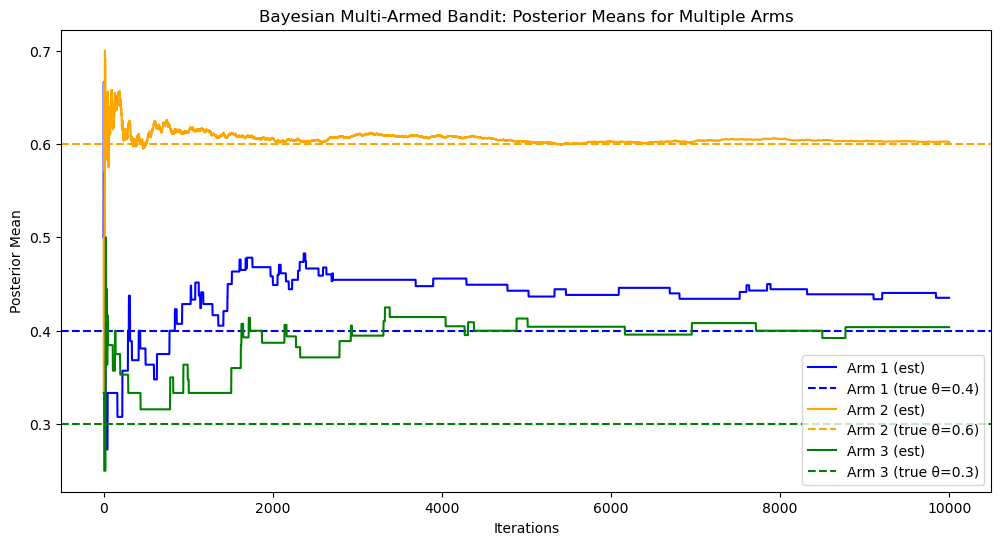

In [96]:
import numpy as np
import matplotlib.pyplot as plt

def run_bayesian_bandit(true_thetas, iterations=10000):
    """
    Run a Bayesian Multi-Armed Bandit with Thompson Sampling for multiple arms.

    Parameters
    ----------
    true_thetas : list or array
        The true success probabilities for each arm, e.g. [0.4, 0.6, 0.3].
    iterations : int
        Number of iterations (trials) to run.

    Returns
    -------
    choices : list of int
        Which arm was chosen at each iteration.
    posterior_means : 2D list (or array)
        posterior_means[i][t] is the posterior mean of arm i at time t.
    """
    
    n_arms = len(true_thetas)
    
    # Initialize Beta parameters (α and β) for each arm.
    # Here we use alpha=1, beta=1 for a flat prior, but you can change these.
    alpha = np.ones(n_arms)
    beta = np.ones(n_arms)
    
    # To track which arm was chosen each iteration
    choices = []
    
    # To track the posterior mean of each arm over time:
    # posterior_means[i][t] = mean of arm i at time t
    posterior_means = [[] for _ in range(n_arms)]
    
    for t in range(iterations):
        # Sample from each arm's current Beta distribution
        sampled_thetas = np.random.beta(alpha, beta)
        
        # Choose the arm with the highest sampled value
        chosen_arm = np.argmax(sampled_thetas)
        choices.append(chosen_arm)
        
        # Simulate the reward (success = 1/0) using the chosen arm's true probability
        reward = 1 if (np.random.rand() < true_thetas[chosen_arm]) else 0
        
        # Update the Beta parameters for the chosen arm
        alpha[chosen_arm] += reward
        beta[chosen_arm] += (1 - reward)
        
        # Record the posterior mean for each arm at this time step
        for i in range(n_arms):
            mean_i = alpha[i] / (alpha[i] + beta[i])
            posterior_means[i].append(mean_i)
            
    return choices, posterior_means


# ----------------------------
# Example usage with 3 arms
# ----------------------------
true_thetas_example = [0.4, 0.6, 0.3]  # True probabilities for each arm
iterations = 10000

choices, posterior_means = run_bayesian_bandit(true_thetas_example, iterations)

# Convert list-of-lists to array for easier plotting
posterior_means = np.array(posterior_means)  # shape: (n_arms, iterations)

# Plot the posterior means of each arm over time
plt.figure(figsize=(12, 6))
n_arms = len(true_thetas_example)
colors = ["blue", "orange", "green", "red", "purple", "brown", "pink"]
for i in range(n_arms):
    plt.plot(posterior_means[i], label=f"Arm {i+1} (est)", color=colors[i % len(colors)])
    plt.axhline(true_thetas_example[i], linestyle='--', color=colors[i % len(colors)], 
                label=f"Arm {i+1} (true θ={true_thetas_example[i]})")

plt.xlabel("Iterations")
plt.ylabel("Posterior Mean")
plt.title("Bayesian Multi-Armed Bandit: Posterior Means for Multiple Arms")
plt.legend()
plt.show()

# Plot the cumulative number of times each arm is chosen
cumulative_choices = np.array([
    np.cumsum([1 if c == i else 0 for c in choices])
    for i in range(n_arms)
])

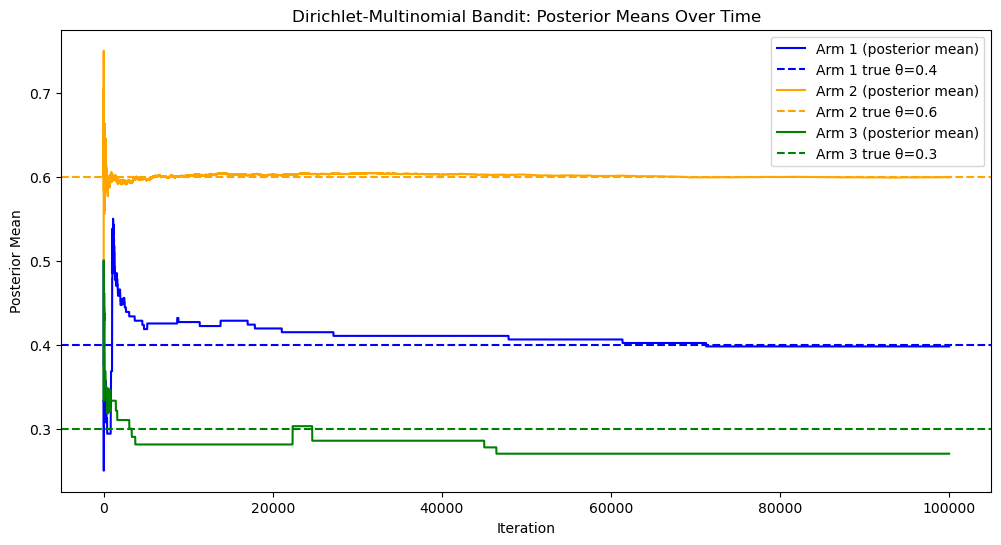

In [89]:
import numpy as np
import matplotlib.pyplot as plt

def run_dirichlet_multinomial_bandit(true_thetas, iterations=10000):
    """
    Multi-armed bandit via a single Dirichlet-Multinomial model.
    
    Parameters
    ----------
    true_thetas : list or 1D array of floats
        True success probabilities for each arm, e.g. [0.4, 0.6, 0.3].
    iterations : int
        Number of trials to simulate.
        
    Returns
    -------
    choices : list of int
        Which arm was chosen at each iteration.
    posterior_means : 2D array (shape: (n_arms, iterations))
        posterior_means[i, t] = estimated success probability of arm i at iteration t.
    """
    n_arms = len(true_thetas)
    
    # We have 2N categories: category i = "arm i success", category i+N = "arm i failure"
    alpha = np.ones(2 * n_arms)  # Dirichlet(1, 1, ..., 1) as a flat prior
    
    # To track which arm we pick each iteration
    choices = []
    
    # Posterior means for each arm over time
    posterior_means = np.zeros((n_arms, iterations))
    
    for t in range(iterations):
        # Sample once from the Dirichlet
        p = np.random.dirichlet(alpha)
        
        # For each arm i, interpret p[i]/(p[i] + p[i+N]) as the success probability
        success_probs = []
        for i in range(n_arms):
            denom = p[i] + p[i + n_arms]
            success_probs.append(p[i] / denom if denom > 0 else 0.5)
        
        # Choose the arm with the highest sampled success probability
        chosen_arm = np.argmax(success_probs)
        choices.append(chosen_arm)
        
        # Simulate a Bernoulli trial with the chosen arm's true success probability
        reward = (np.random.rand() < true_thetas[chosen_arm])
        
        # Update alpha for the chosen arm, success vs failure
        if reward:
            alpha[chosen_arm] += 1
        else:
            alpha[chosen_arm + n_arms] += 1
        
        # Record the posterior mean for each arm i, 
        # which is alpha[i]/(alpha[i]+alpha[i+N]) in this model
        for i in range(n_arms):
            ai_succ = alpha[i]
            ai_fail = alpha[i + n_arms]
            posterior_means[i, t] = ai_succ / (ai_succ + ai_fail)
            
    return choices, posterior_means

# ----------------------------
# Example usage with 3 arms
# ----------------------------
true_thetas_example = [0.4, 0.6, 0.3]
iterations = 100000

choices, posterior_means = run_dirichlet_multinomial_bandit(true_thetas_example, iterations)

# Plot the posterior means for each arm over time
plt.figure(figsize=(12, 6))
colors = ["blue", "orange", "green", "red", "purple"]
for i, theta_true in enumerate(true_thetas_example):
    plt.plot(posterior_means[i], label=f"Arm {i+1} (posterior mean)", color=colors[i])
    plt.axhline(y=theta_true, linestyle='--', color=colors[i],
                label=f"Arm {i+1} true θ={theta_true}")
plt.xlabel("Iteration")
plt.ylabel("Posterior Mean")
plt.title("Dirichlet-Multinomial Bandit: Posterior Means Over Time")
plt.legend()
plt.show()

# Plot how many times each arm was chosen
cumulative_choices = np.array([
    np.cumsum([1 if c == i else 0 for c in choices])
    for i in range(len(true_thetas_example))
])
